In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#importing needed libraries


In [2]:
#importing data file
bikes=pd.read_csv('day.csv')
bikes.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikes.info()
#there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#as per data dictionary, season and weather sit columns are categorical, not ordered, 
#so we should change them to categorical first
bikes['season'] = bikes['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bikes['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [5]:
bikes['weathersit'] = bikes['weathersit'].map({1:"Clear/PartlyCloudy", 2:"Mist", 3:"Light Rain/ Clouds/Snow", 4:"Heavy Rain/Snow/Fog"})
bikes['weathersit'].value_counts()

Clear/PartlyCloudy         463
Mist                       246
Light Rain/ Clouds/Snow     21
Name: weathersit, dtype: int64

In [6]:

bikes['weekday'].value_counts()
bikes['weekday'] = bikes['weekday'].map({0:"Monday", 1:"Tuesday", 2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",
                                         6:"Sunday"})


In [7]:
#As we need to take 'cnt' as target variable, we can drop casual and registered columns
bikes.drop(['casual','registered'],axis=1,inplace=True)


<Figure size 1440x432 with 0 Axes>

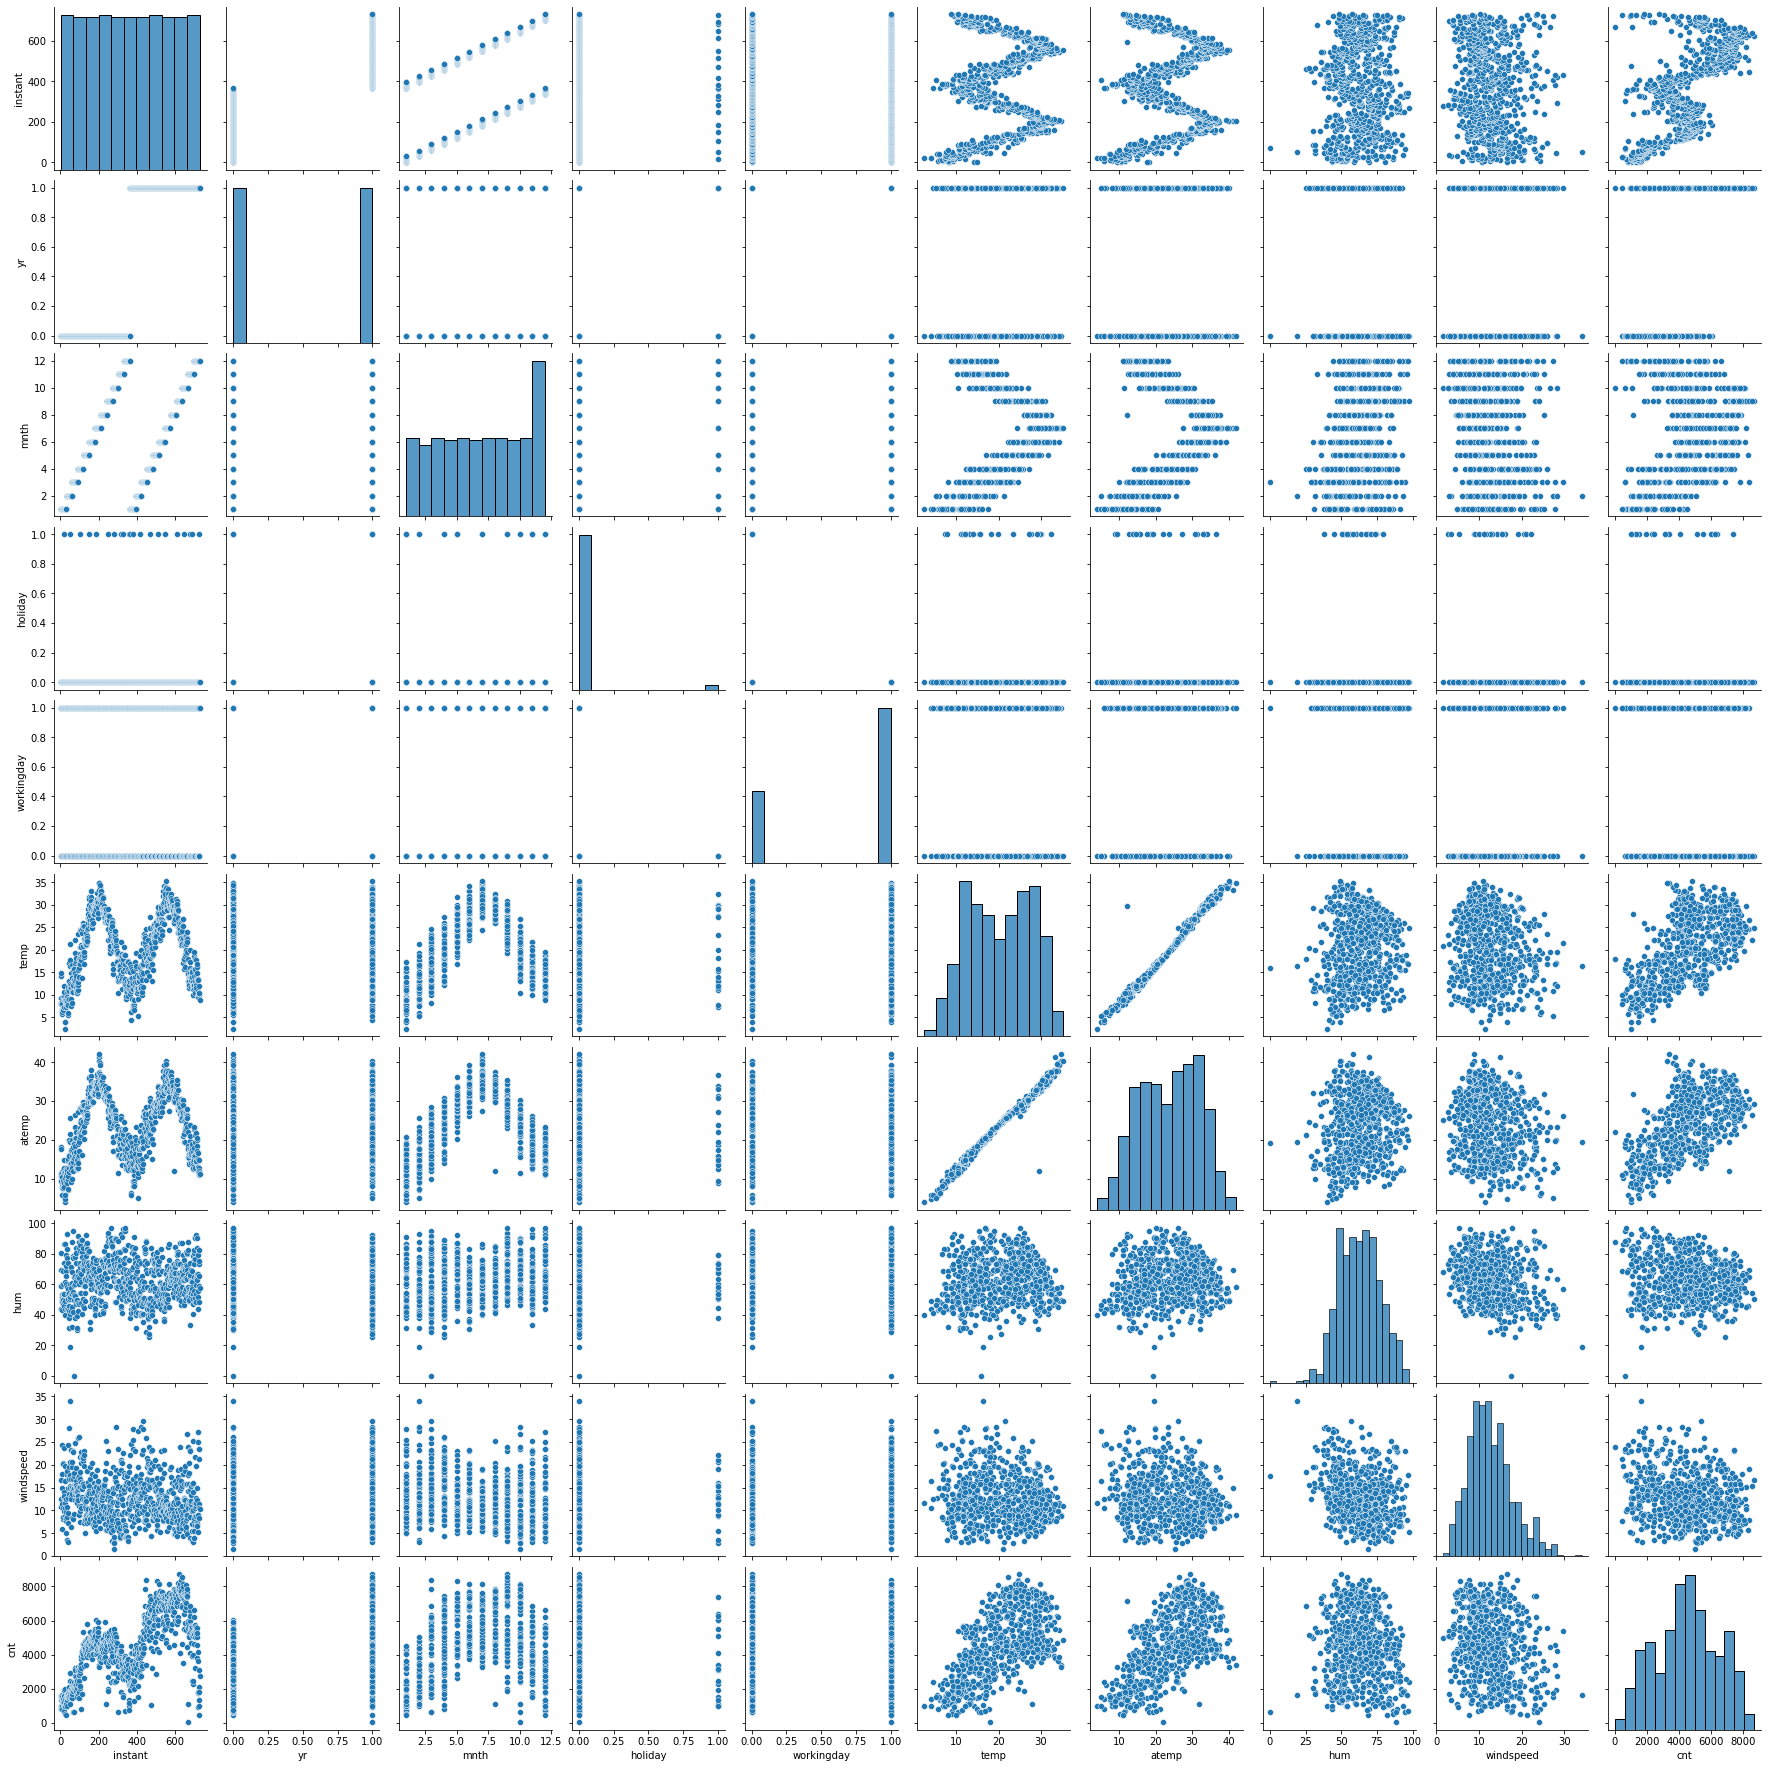

In [8]:
plt.figure(figsize=(20,6))

sns.pairplot(bikes)
plt.show()

#pairplot showing some signs of relationsship between temperature and cnt
#clearly there are some categorical variables which should be changed to numerical variables

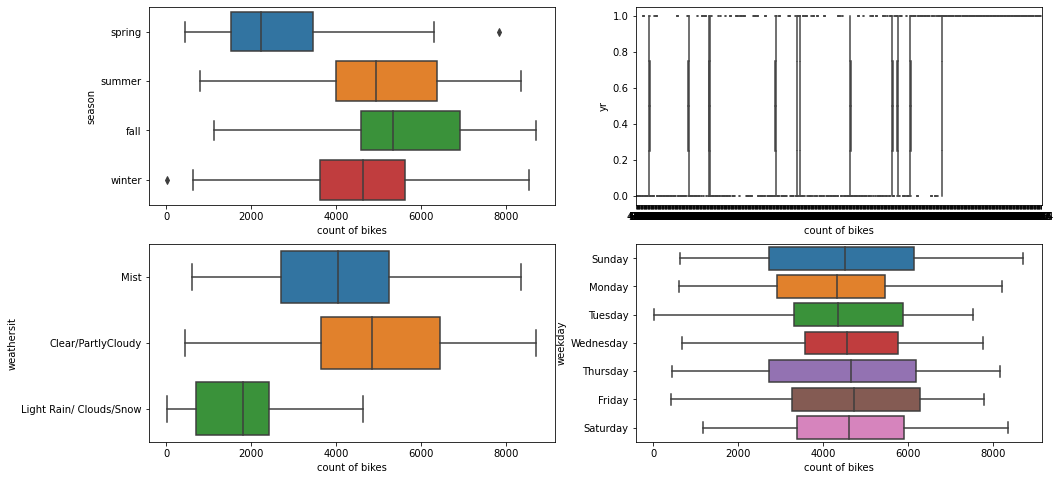

In [9]:

#Plotting cnt of bikes vs other categorical variables to see any trend
plt.figure(figsize=(16,8))

catvariables=['season','yr','weathersit','weekday']
count=1
for i in catvariables:
    plt.subplot(2,2,count)
    sns.boxplot(x='cnt', y= i,data=bikes)
    plt.xlabel('count of bikes')
    count=count+1
plt.show()

#Observations: We can see that count is higher with season in fall and summer
#count is higher with weather as mist and clear
#weekday does not have impact on total bikes count
#year is 


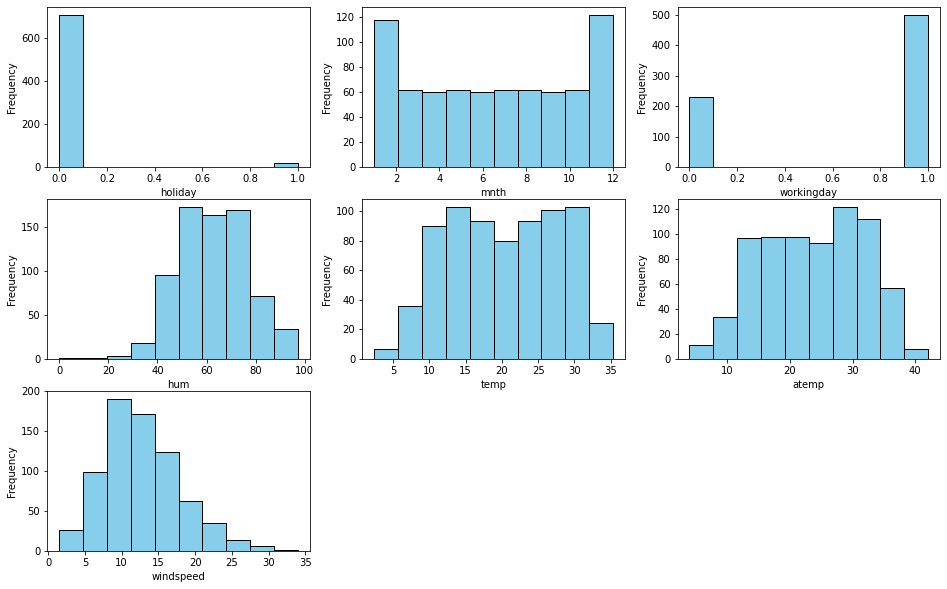

In [10]:
#Plotting to see cnt with other variables

plt.figure(figsize=(16,10))

vars1=['holiday','mnth','workingday','hum','temp','atemp','windspeed']
count=1
for i in vars1:
    plt.subplot(3,3,count)
    bikes[i].plot.hist(bins=10,edgecolor='black',color='skyblue')
    plt.xlabel(i)
    count=count+1
plt.show()

#Observation:
#cnt is higher on a workingday, lower on a holiday, suggesting that office goers take the bikes generally on working days.
#cnt is higher on days with high humidity
#cnt is higher on days with low windspeed.

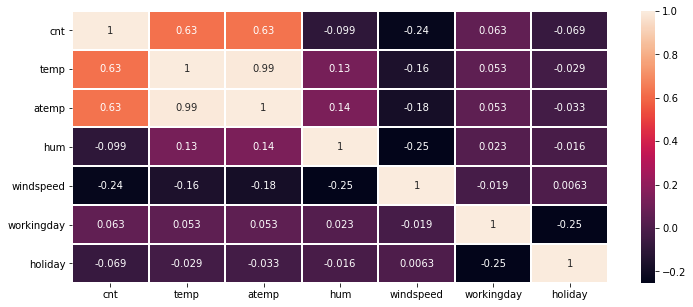

In [11]:

plt.figure(figsize=(12,5))
sub_df = bikes[['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'workingday', 'holiday']]
sns.heatmap(sub_df.corr(), annot=True, linewidths=1);



#Here are a few inferences you can draw by looking at the above histograms:

#Variable temp is positively correlated with dependent variables.

#Variable atemp is highly correlated with temp.

In [12]:
#Creating columns for all categorical value for all their categories.

bikes['mnth'] = bikes['mnth'].map({1:"Jan", 2:"Feb", 3:"Mar", 
                                         4:"Apr",5:"May",6:"Jun",7:"Jul",
                                  8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"})

catvariables=['season','yr','weathersit','weekday','mnth']
dfseason=pd.get_dummies(bikes['season'],drop_first=True)
dfmnth=pd.get_dummies(bikes['mnth'],drop_first=True)
dfweathersit=pd.get_dummies(bikes['weathersit'],drop_first=True)
dfweekday=pd.get_dummies(bikes['weekday'],drop_first=True)

bikes=pd.concat([bikes,dfseason,dfweathersit,dfweekday,dfmnth],axis=1)

In [13]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,1,01-01-2018,spring,0,Jan,0,Sunday,0,Mist,14.110847,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,spring,0,Jan,0,Monday,0,Mist,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,spring,0,Jan,0,Tuesday,1,Clear/PartlyCloudy,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,spring,0,Jan,0,Wednesday,1,Clear/PartlyCloudy,8.200000,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,spring,0,Jan,0,Thursday,1,Clear/PartlyCloudy,9.305237,...,0,0,1,0,0,0,0,0,0,0


In [14]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Light Rain/ Clouds/Snow', 'Mist',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sept'],
      dtype='object')

In [15]:
#dropping columns that are not needed for modelling
 
drop_cols=['instant','dteday','season','weekday','weathersit','mnth']
bikes.drop(drop_cols,axis=1,inplace=True)

In [16]:
bikes

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,1,0,0,0,0,0,0,0,0,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,1,0,0,0,0,0,0,0,0,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
#spliting the test and train data set

from sklearn.model_selection import train_test_split
#using seed to split the data with same roes respectively
np.random.seed(0)
df_train,df_test=train_test_split(bikes,train_size=0.70,test_size=0.30,random_state=100)

In [18]:
#scaling 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

num_vars=['temp','atemp','hum','windspeed','cnt']
bikes[num_vars]=scaler.fit_transform(bikes[num_vars])

In [19]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,0,0.355170,0.373517,0.828620,0.284606,0.110792,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0.379232,0.360541,0.715771,0.466215,0.089623,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.152669,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.177174,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.181546,1,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
bikes.dtypes

yr                           int64
holiday                      int64
workingday                   int64
temp                       float64
atemp                      float64
hum                        float64
windspeed                  float64
cnt                        float64
spring                       uint8
summer                       uint8
winter                       uint8
Light Rain/ Clouds/Snow      uint8
Mist                         uint8
Monday                       uint8
Saturday                     uint8
Sunday                       uint8
Thursday                     uint8
Tuesday                      uint8
Wednesday                    uint8
Aug                          uint8
Dec                          uint8
Feb                          uint8
Jan                          uint8
Jul                          uint8
Jun                          uint8
Mar                          uint8
May                          uint8
Nov                          uint8
Oct                 

In [21]:
#creating dependent variable (y) and independent variables(X)

y_train = bikes.pop('cnt')
X_train = bikes

In [22]:
#importing linear regression libary

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [23]:
#creating a function to fit linear regression and print summary

def linear_reg_statsm(var):
    X_Train_sm=sm.add_constant(var)
    lr=sm.OLS(y_train,X_Train_sm).fit()
    print(lr.params)
    print(lr.summary())


In [24]:
#creating a function to print VIF values on given variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def findVif(df):
    vif=pd.DataFrame()
    vif['features']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range (df.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
findVif(X_train)

#clearly we need to remove columns one by one as VIF is very large for some columns and p value is also very large 




                   features        VIF
2                workingday  90.253459
3                      temp  80.736907
4                     atemp  69.986743
12                   Monday  19.082848
14                   Sunday  18.856329
7                    spring  10.410474
9                    winter   8.330891
8                    summer   7.967782
26                      Nov   6.389741
27                      Oct   6.256189
22                      Jul   5.923580
21                      Jan   5.876291
18                      Aug   5.705076
19                      Dec   5.619993
20                      Feb   5.043876
1                   holiday   5.008734
28                     Sept   4.818237
24                      Mar   3.264590
23                      Jun   2.852287
25                      May   2.159205
5                       hum   2.140051
16                  Tuesday   1.815294
13                 Saturday   1.731486
15                 Thursday   1.727235
17                Wednesd

In [25]:
#clearly we would need to use RFE model as we have very large number of variables.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [26]:
#fitting a model with 20 features using RFE

lmsk=LinearRegression()
lmsk.fit(X_train,y_train)
rfe1=RFE(lmsk,n_features_to_select=20)
rfe1=rfe1.fit(X_train,y_train)
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Light Rain/ Clouds/Snow', True, 1),
 ('Mist', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 8),
 ('Sunday', True, 1),
 ('Thursday', False, 9),
 ('Tuesday', False, 2),
 ('Wednesday', False, 3),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 4),
 ('Mar', False, 5),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sept', True, 1)]

In [27]:
X_train.columns[~rfe1.support_]

Index(['summer', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Jun',
       'Mar', 'Oct'],
      dtype='object')

In [28]:
rfecols=X_train.columns[rfe1.support_]
rfecols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'Light Rain/ Clouds/Snow', 'Mist', 'Monday',
       'Sunday', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sept'],
      dtype='object')

In [29]:
X_Train_Rfe=X_train[rfecols]

In [30]:
#calling linear regression function and VIF function to check the model

linear_reg_statsm(X_Train_Rfe)
findVif(X_Train_Rfe)

const                      0.296121
yr                         0.232920
holiday                    0.022888
workingday                 0.101188
temp                       0.261949
atemp                      0.151280
hum                       -0.174279
windspeed                 -0.159209
spring                    -0.093719
winter                     0.085437
Light Rain/ Clouds/Snow   -0.225415
Mist                      -0.052031
Monday                     0.060680
Sunday                     0.111365
Dec                       -0.071787
Feb                       -0.044687
Jan                       -0.064020
Jul                       -0.053701
May                        0.031965
Nov                       -0.073064
Sept                       0.057532
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                

In [31]:
#dropping temp as it has a very high p value
#calling linear regression function and VIF function to check the model
X_Train_Rfe.drop('atemp',axis=1,inplace=True)

linear_reg_statsm(X_Train_Rfe)
findVif(X_Train_Rfe)

const                      0.298140
yr                         0.232915
holiday                    0.022765
workingday                 0.101854
temp                       0.400943
hum                       -0.171292
windspeed                 -0.163723
spring                    -0.093553
winter                     0.086513
Light Rain/ Clouds/Snow   -0.227396
Mist                      -0.052506
Monday                     0.061506
Sunday                     0.112015
Dec                       -0.072338
Feb                       -0.045063
Jan                       -0.065518
Jul                       -0.053259
May                        0.032708
Nov                       -0.073446
Sept                       0.056801
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Leas

In [32]:
#dropping holiday as it has a very high p value
#calling linear regression function and VIF function to check the model

X_Train_Rfe.drop('holiday',axis=1,inplace=True)

linear_reg_statsm(X_Train_Rfe)
findVif(X_Train_Rfe)

const                      0.320905
yr                         0.232915
workingday                 0.079089
temp                       0.400943
hum                       -0.171292
windspeed                 -0.163723
spring                    -0.093553
winter                     0.086513
Light Rain/ Clouds/Snow   -0.227396
Mist                      -0.052506
Monday                     0.038741
Sunday                     0.089249
Dec                       -0.072338
Feb                       -0.045063
Jan                       -0.065518
Jul                       -0.053259
May                        0.032708
Nov                       -0.073446
Sept                       0.056801
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:            

In [33]:
#dropping Monday as it has a very high p value
#calling linear regression function and VIF function to check the model

X_Train_Rfe.drop('Monday',axis=1,inplace=True)

linear_reg_statsm(X_Train_Rfe)
findVif(X_Train_Rfe)

const                      0.354635
yr                         0.232921
workingday                 0.046776
temp                       0.398838
hum                       -0.170260
windspeed                 -0.164115
spring                    -0.094323
winter                     0.086458
Light Rain/ Clouds/Snow   -0.227428
Mist                      -0.052738
Sunday                     0.056915
Dec                       -0.073341
Feb                       -0.045684
Jan                       -0.066610
Jul                       -0.053337
May                        0.032078
Nov                       -0.075766
Sept                       0.056198
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     231.0
Date:                

In [34]:
#dropping hum as it has a very high VIF
#calling linear regression function and VIF function to check the model

X_Train_Rfe.drop('hum',axis=1,inplace=True)

linear_reg_statsm(X_Train_Rfe)
findVif(X_Train_Rfe)

const                      0.262873
yr                         0.237929
workingday                 0.049631
temp                       0.366444
windspeed                 -0.131719
spring                    -0.098125
winter                     0.077147
Light Rain/ Clouds/Snow   -0.280309
Mist                      -0.080457
Sunday                     0.059890
Dec                       -0.080678
Feb                       -0.047033
Jan                       -0.071930
Jul                       -0.047235
May                        0.020426
Nov                       -0.077586
Sept                       0.047103
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     234.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic

In [35]:
#dropping May as it has a very p value
#calling linear regression function and VIF function to check the model

X_Train_Rfe.drop('May',axis=1,inplace=True)

linear_reg_statsm(X_Train_Rfe)
findVif(X_Train_Rfe)

const                      0.268136
yr                         0.237908
workingday                 0.049301
temp                       0.366536
windspeed                 -0.133400
spring                    -0.102417
winter                     0.073127
Light Rain/ Clouds/Snow   -0.280869
Mist                      -0.079951
Sunday                     0.059506
Dec                       -0.081223
Feb                       -0.047222
Jan                       -0.072191
Jul                       -0.051868
Nov                       -0.078122
Sept                       0.043460
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     249.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          8.11e-272
Time:         

In [36]:
#dropping temp as it has a very high VIF
#calling linear regression function and VIF function to check the model

X_Train_Rfe.drop('temp',axis=1,inplace=True)

linear_reg_statsm(X_Train_Rfe)
findVif(X_Train_Rfe)

const                      0.519863
yr                         0.245490
workingday                 0.055109
windspeed                 -0.168173
spring                    -0.185003
winter                     0.025482
Light Rain/ Clouds/Snow   -0.297392
Mist                      -0.088705
Sunday                     0.058457
Dec                       -0.143716
Feb                       -0.097645
Jan                       -0.150896
Jul                        0.018937
Nov                       -0.133517
Sept                       0.066107
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.02e-238
Time:                        09:06:21   Log-Likeli

In [37]:
#dropping Jul as it has a very p value
#calling linear regression function and VIF function to check the model

X_Train_Rfe.drop('Jul',axis=1,inplace=True)

linear_reg_statsm(X_Train_Rfe)
findVif(X_Train_Rfe)

const                      0.525100
yr                         0.245473
workingday                 0.054764
windspeed                 -0.171556
spring                    -0.188045
winter                     0.022476
Light Rain/ Clouds/Snow   -0.297312
Mist                      -0.089757
Sunday                     0.058262
Dec                       -0.144137
Feb                       -0.097880
Jan                       -0.151144
Nov                       -0.134099
Sept                       0.063357
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.62e-239
Time:                        09:06:21   Log-Likelihood:                 647.56
No. Obs

In [38]:
##dropping winter as it has a very p value
#calling linear regression function and VIF function to check the model

X_Train_Rfe.drop('winter',axis=1,inplace=True)

linear_reg_statsm(X_Train_Rfe)
findVif(X_Train_Rfe)

const                      0.530009
yr                         0.245562
workingday                 0.054550
windspeed                 -0.174888
spring                    -0.196648
Light Rain/ Clouds/Snow   -0.293356
Mist                      -0.088704
Sunday                     0.058030
Dec                       -0.130948
Feb                       -0.093128
Jan                       -0.146530
Nov                       -0.115755
Sept                       0.064942
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     236.9
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          5.84e-240
Time:                        09:06:21   Log-Likelihood:                 645.78
No. Observations:                 730   AIC

In [39]:
#We can use thi as final model as there is not variable having high VIF (>5) and no variable having high p value(>0.05)

#### Residual Analysis

In [40]:

X_train_new=sm.add_constant(X_Train_Rfe)
lmnw=sm.OLS(y_train,X_train_new).fit()
y_train_p=lmnw.predict(X_train_new)


In [41]:
res=y_train-y_train_p

Text(0.5, 0, 'Errors')

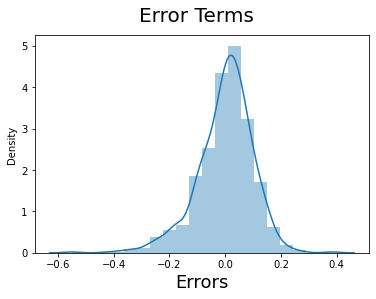

In [42]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [43]:
#### Plot showing a normally distributed residuals

In [44]:
# dropping constant to extract only column values to plot against residuals

X_train_new.drop('const',axis=1,inplace=True)



<function matplotlib.pyplot.show(close=None, block=None)>

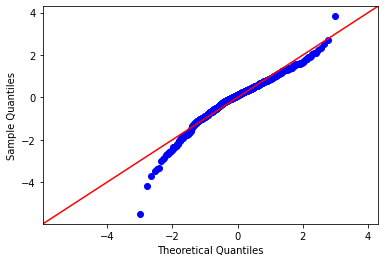

In [55]:
#plotting QQ plotof residuals

sm.qqplot(res,fit=True,line='45')
plt.show

#QQ-plots shows heavier tails than a normal distribution.

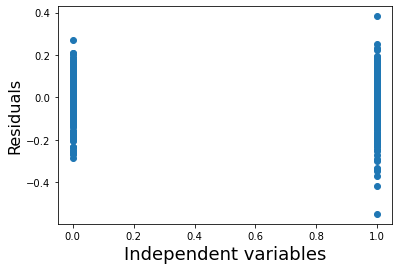

In [45]:
X_t=X_train_new.iloc[:,0].values
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

#### This shows that our model suffers from autocorrelation as the variable yr is prsent in the model which will lead to auto correlation as demand next year will be dependent on previous year.

In [46]:
# predicting for test data set

num_vars=['temp','atemp','hum','windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])

X_test=df_test[X_train_new.columns]

In [47]:
y_test=df_test.pop('cnt')

In [48]:
#adding constant as statsmodel does not add this automatically
X_test=sm.add_constant(X_test)
y_test_pred=lmnw.predict(X_test)

<AxesSubplot:ylabel='windspeed'>

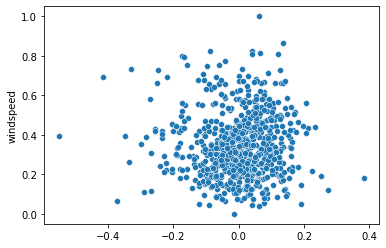

In [49]:
#validating homoscedasticity by plotting residuals versus individual independent variable i.e. windspeed

sns.scatterplot(res,X_train_new.windspeed)
#Plot is not showing any pattern , hence showing that model is homoscedastic

Text(0.5, 0.98, 'y_test vs y_test_pred')

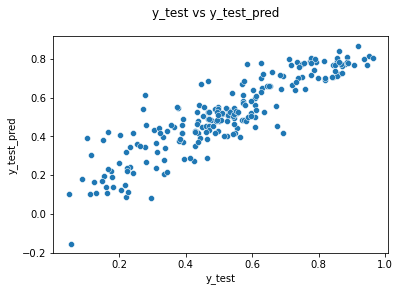

In [50]:
# below graph shows that predictions and actuals test data has a linear relationship
sns.scatterplot(y_test,y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.suptitle('y_test vs y_test_pred')

In [51]:
#calculating Rsquare and RMSE

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [52]:
rscore=r2_score(y_test,y_test_pred)
rscore

0.7999892130601499

In [53]:
mse=mean_squared_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
rmse

0.09746627090682355

Final Equation of linear model :

### cnt =  0.53 + 0.2456 X yr  +   0.0545 X workingday  -   0.1749 X windspeed  - 0.1966 X spring  - 0.2934 X LightRain/Clouds/Snow - 0.0887 X Mist  +   0.058 X Sunday  -   0.1309 X Dec  -  0.0931 X Feb  -  0.1465 X Jan  -   0.1158 X Nov  +   0.0649 X Sept  

  

Demand for bikes depends mainly on below variables:
yr , workingday, windspeed ,Spring, Mist, LightRain/Clouds/Snow,Sunday,Dec,Feb,Jan, Nov, Sept

Demands increases on a working day and is increasing with increase in year.
Demand decreases with increase in windspeed , and with Spring, Mist, LightRain/Clouds/Snow 

Final recommendations for the company:
Demand is higher on a working day with low windspeed 